In [2]:
# Datahåndtering
import numpy as np
import pandas as pd

# NLP
import spacy
import string
from spacy.tokenizer import Tokenizer

# Web scraping
from bs4 import BeautifulSoup as bs
import requests

# Visualisering
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Sæt visualiseringsindstillinger
%matplotlib inline
sns.set(rc={'figure.figsize':(10,6)})

# Indlæs sprogmodel
nlp = spacy.load("da_core_news_sm")

# ØVELSE: Basal web scraping

Lad os prøve at skrive et program, der finder overskrifter på Berlingske (https://www.berlingske.dk/nyheder).

1. Indlæs HTML-indholdet af forsiden af Berlingske med `requests.get(url).content` (husk at gemme det i et objekt)
2. Konverter HTML-indholdet til et soup-objekt med `bs(content)` (husk at gemme det i et objekt)
3. Print tekstindholdet af det første `<h4>` tag (brug `soup.find()` og `.get_text()`)

**BONUS**
4. Skriv et stykke kode, der udleder linket til den første artikel på https://www.berlingske.dk/nyheder (udforsk HTML enten direkte i python eller gennem din browser)

## LØSNING

In [3]:
# 1
html = requests.get("https://www.berlingske.dk/nyheder").content

# 2
ber_soup = bs(html)

# 3
print(ber_soup.find("h4").get_text(strip = True))

# 4
print("https://www.berlingske.dk/" + ber_soup.find("a", class_ = "teaser__title-link")['href'])

Fire uger før valget taler Pelosi om at fjerne Trump: »Kunne det blive dummere?«
https://www.berlingske.dk//internationalt/fire-uger-foer-valget-taler-pelosi-om-at-fjerne-trump-kunne-det


# ØVELSE: Indhold i tekst

Datasættet 'pol-tweets-2020_sample.csv' (https://github.com/CALDISS-AAU/workshop_python-text-mining/raw/master/data/pol-tweets-2020_sample.csv) indholder et udtræk af 500 tilfældige tweets fra danske politikere.

1. Lav en variabel, der indikerer, om tweetet indeholder ordet "klima"
2. Find ud af hvor mange tweets, der nævner "klima"

**BONUS**
3. Skriv kode (fx en visualisering), der viser, hvem der snakker meget om klima

## LØSNING

In [4]:
tweets = pd.read_csv('https://github.com/CALDISS-AAU/workshop_python-text-mining/raw/master/data/pol-tweets-2020_sample.csv')

# 1
tweets['klima'] = tweets['tweet'].str.contains("klima", case = False)

# 2
print(f"{tweets['klima'].sum()} tweets indeholder ordet 'klima'")

tweets.loc[tweets['klima'] == True, :].head()

35 tweets indeholder ordet 'klima'


,date,hashtags,name,time,tweet,urls,username,klima
12,2020-06-04,['#dkgreen'],Rasmus Stoklund,19:36:04,Flot ros til #dkgreen 🍀 https://twitter.com/Kl...,['https://twitter.com/KlimaMin/status/12685598...,rstoklund,True
16,2020-05-05,"['#grøngenstart', '#dkpol']",Josephine Fock,21:25:48,Og derfor skal vi genstarte DK klogt med en kl...,['https://twitter.com/politikdr/status/1257749...,josephinefock,True
40,2020-05-26,['#dkgreen'],Mette Abildgaard,19:02:45,Til klimamødet i aften vil @SorenPape og jeg e...,[],metteabildgaard,True
54,2020-06-09,"['#dkpol', '#dkgreen']",Signe Munk,22:36:57,Vi skal brænde mindre træ af i Danmark. Vejen ...,['https://www.information.dk/indland/2020/06/e...,signe_munk,True
66,2020-01-22,"['#dkpol', '#dkgreen']",Signe Munk,09:05:41,De nye tal viser med al tydelighed at drivhusg...,['https://www.dr.dk/nyheder/politik/torre-forh...,signe_munk,True


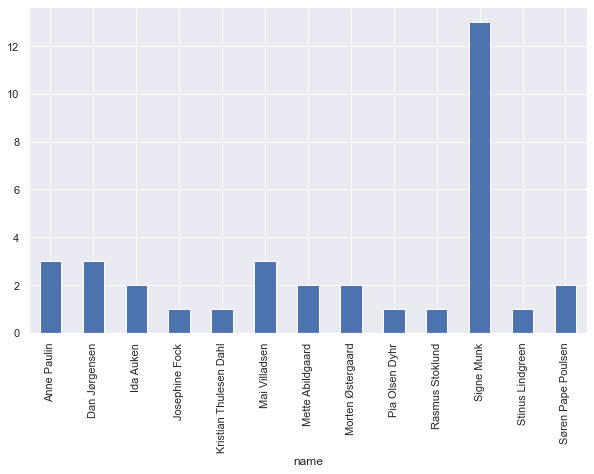

In [5]:
tweets.loc[tweets['klima'] == True, :].groupby('name').size().plot.bar()

# ØVELSE: Nøgleord fra tweets

Udled nøgleord (mest populære tokens) af datasættet "pol-tweets-2020_sample" (https://github.com/CALDISS-AAU/workshop_python-text-mining/raw/master/data/pol-tweets-2020_sample.csv).

**BONUS**
Undersøg hvem der særligt tweeter om nøgleordene.

## Løsning - Liste tilgang

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 65039 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 55357 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 56834 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 10084 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 56474 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 65039 missing from c

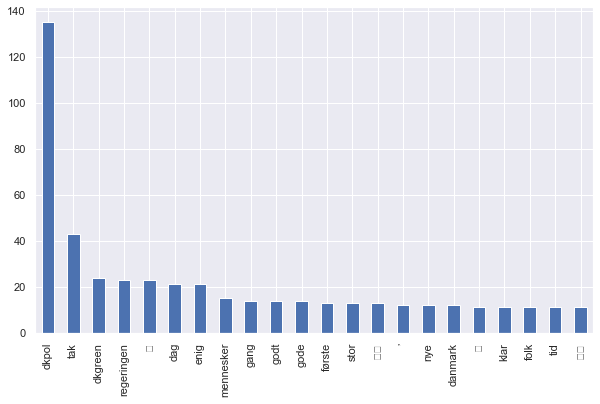

In [6]:
tweets_df = pd.read_csv('../data/pol-tweets-2020_sample.csv')

def tokenize_function(text):
    doc = nlp(text)

    tokens = []

    tokenizer = Tokenizer(nlp.vocab) # Indlæsning af tokenizer
    pos_tag = ['PROPN', 'ADJ', 'NOUN'] # Beholder adjektiver og navneord
    stopwords = list(nlp.Defaults.stop_words)
    punctuation = string.punctuation + "”"

    for token in doc:
    
        if(token.text.lower() in stopwords or token.text in punctuation):
            continue

        if(token.pos_ in pos_tag):
            tokens.append(token.text.lower())
        
    return(tokens)

tweets = ' '.join(list(tweets_df['tweet'])) # Al tekst samles i en string

tweet_tokens = tokenize_function(tweets)

tweet_tokens_series = pd.Series(tweet_tokens)

tweet_counts = tweet_tokens_series.value_counts()
tweet_counts = tweet_counts[tweet_counts > 10]

tweet_counts.plot.bar()

## LØSNING - tidy data tilgang

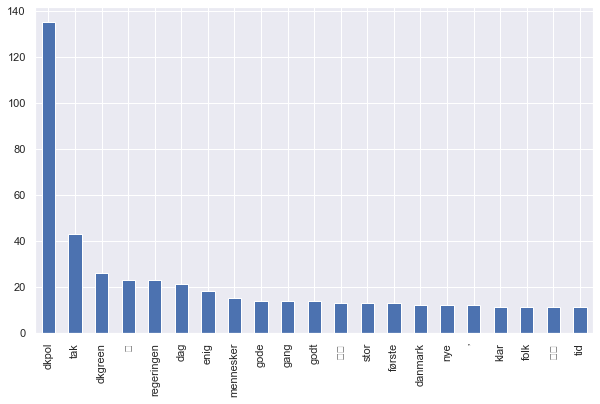

In [7]:
tweets_df = pd.read_csv('../data/pol-tweets-2020_sample.csv')

def tokenize_function(text):
    doc = nlp(text)

    tokens = []

    tokenizer = Tokenizer(nlp.vocab) # Indlæsning af tokenizer
    pos_tag = ['PROPN', 'ADJ', 'NOUN'] # Beholder adjektiver og navneord
    stopwords = list(nlp.Defaults.stop_words)
    punctuation = string.punctuation + "”"

    for token in doc:
    
        if(token.text.lower() in stopwords or token.text in punctuation):
            continue

        if(token.pos_ in pos_tag):
            tokens.append(token.text.lower())
        
    return(tokens)

tweets_df['tokens'] = tweets_df['tweet'].apply(tokenize_function)

tweets_df = tweets_df.explode(column = 'tokens')

tweet_counts = tweets_df['tokens'].value_counts()
tweet_counts = tweet_counts[tweet_counts > 10]

tweet_counts.plot.bar()

## LØSNING - BONUS

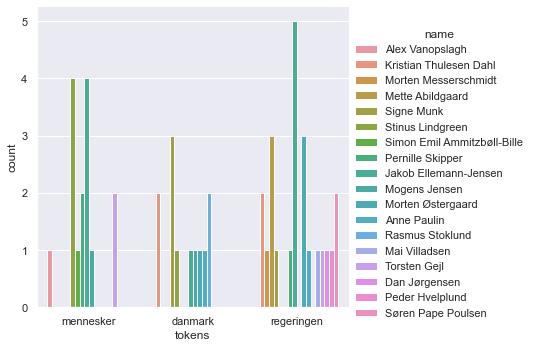

In [8]:
keywords = ["regeringen", "mennesker", "danmark"]

sns.catplot(data = tweets_df.loc[tweets_df['tokens'].isin(keywords), :], kind = "count", x = 'tokens', hue = 'name')

# ØVELSE: Nøgleord fra overskrifter

Udled nøgleord (mest populære tokens) af overskrifterne på Berlingske (https://www.berlingske.dk/nyheder).